In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow import keras



In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("faysalmiah1721758/potato-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/faysalmiah1721758/potato-dataset/versions/1


In [9]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
 77% 29.0M/37.8M [00:00<00:00, 133MB/s] 
100% 37.8M/37.8M [00:00<00:00, 135MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
DATADIR = '/content/PotatoDisease' #base directory
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'] #labels

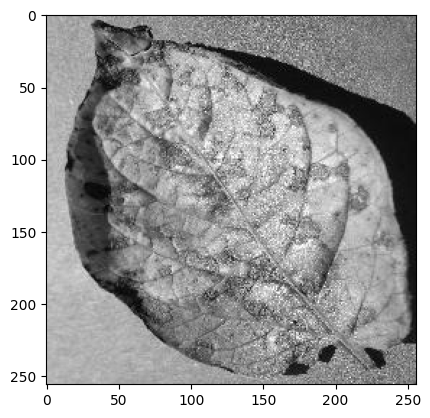

In [16]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # constructing the path to potato disease
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap= 'gray')
    break
  break

array([[186, 186, 176, ..., 104, 106, 144],
       [175, 177, 170, ..., 108, 125, 111],
       [167, 170, 165, ..., 103, 124, 118],
       ...,
       [186, 182, 177, ..., 113, 119, 129],
       [184, 183, 181, ..., 128, 111, 113],
       [177, 181, 186, ..., 129, 111,  80]], dtype=uint8)
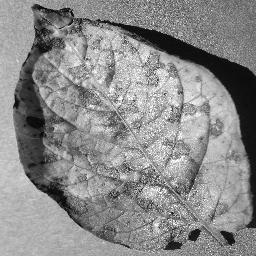

In [18]:
img_array

In [19]:
img_array.shape

(256, 256)

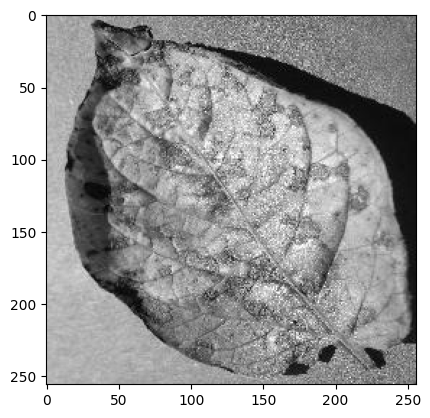

In [22]:
IMG_SIZE = 256 #resize all images
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')

In [26]:
#CREATING TRAINING DATA
training_data = []

def create_training_data():
 for category in CATEGORIES:
  path = os.path.join(DATADIR, category) # constructing the path to potato disease
  class_num = CATEGORIES.index(category)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append([new_array, class_num])
    except Exception as e:
      pass

create_training_data()

In [27]:
len(training_data)

2152

In [28]:
import random
random.shuffle(training_data)

In [31]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

type(X), type(y)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y= np.array(y)

In [33]:
X = X/255
X

array([[[[0.70196078],
         [0.69411765],
         [0.69411765],
         ...,
         [0.60392157],
         [0.5372549 ],
         [0.65882353]],

        [[0.67058824],
         [0.67058824],
         [0.67843137],
         ...,
         [0.62745098],
         [0.69411765],
         [0.67058824]],

        [[0.63137255],
         [0.63529412],
         [0.63921569],
         ...,
         [0.57647059],
         [0.74117647],
         [0.64705882]],

        ...,

        [[0.5254902 ],
         [0.54901961],
         [0.60392157],
         ...,
         [0.56470588],
         [0.4745098 ],
         [0.61568627]],

        [[0.60784314],
         [0.7254902 ],
         [0.55294118],
         ...,
         [0.61176471],
         [0.51372549],
         [0.6       ]],

        [[0.61568627],
         [0.65490196],
         [0.57254902],
         ...,
         [0.49411765],
         [0.47058824],
         [0.59215686]]],


       [[[0.49803922],
         [0.51764706],
         [0.49

In [35]:
#BUILDING CNN MODEL


model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), input_shape = X.shape[1:], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)



Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 343s 6s/step - accuracy: 0.5713 - loss: 1.9598 - val_accuracy: 0.8519 - val_loss: 0.4593
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.8307 - loss: 0.4550 - val_accuracy: 0.9028 - val_loss: 0.2661
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.8973 - loss: 0.2737 - val_accuracy: 0.9352 - val_loss: 0.2054
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 383s 6s/step - accuracy: 0.9419 - loss: 0.1714 - val_accuracy: 0.9120 - val_loss: 0.2385
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 375s 6s/step - accuracy: 0.9774 - loss: 0.0787 - val_accuracy: 0.9259 - val_loss: 0.1901
Epoch 6/10
 3/61 ━━━━━━━━━━━━━━━━━━━━ 5:25 6s/step - accuracy: 0.9965 - loss: 0.0373

KeyboardInterrupt: 